# Twitter Sentiment Analysis 

## Import libraries and Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

# Load the dataset
df = pd.read_csv('tweetsNewFile.csv')

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52542 non-null  object 
 1   content           52542 non-null  object 
 2   country           36 non-null     object 
 3   date_time         52542 non-null  object 
 4   id                52542 non-null  float64
 5   language          52542 non-null  object 
 6   latitude          1 non-null      float64
 7   longitude         1 non-null      float64
 8   number_of_likes   52542 non-null  int64  
 9   number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [5]:
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [6]:
df.shape

(52542, 10)

In [9]:
df['content'].value_counts()

love you                                                                                                                                       11
love                                                                                                                                            8
#PURPOSE https://t.co/ZWMJvhasht                                                                                                                7
I love you                                                                                                                                      6
♡                                                                                                                                               6
                                                                                                                                               ..
The Foo Fighters were so incredible tonight, monster fury rock n' roll, 20 years of locked precision.… http://t.co/vf97dfO3C

In [10]:
df['author'].value_counts()

TheEllenShow     3147
jimmyfallon      3123
ArianaGrande     3104
YouTube          3077
KimKardashian    2939
katyperry        2924
selenagomez      2913
rihanna          2877
BarackObama      2863
britneyspears    2776
instagram        2577
shakira          2530
Cristiano        2507
jtimberlake      2478
ladygaga         2329
Twitter          2290
ddlovato         2217
taylorswift13    2029
justinbieber     2000
cnnbrk           1842
Name: author, dtype: int64

In [8]:
df['number_of_likes'].value_counts()

24       47
37       39
39       38
34       35
40       35
         ..
14036     1
11991     1
22232     1
20187     1
32220     1
Name: number_of_likes, Length: 19572, dtype: int64

In [7]:
# Get the number of columns
num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")


Number of columns: 10


In [11]:
df.isnull().sum()

author                  0
content                 0
country             52506
date_time               0
id                      0
language                0
latitude            52541
longitude           52541
number_of_likes         0
number_of_shares        0
dtype: int64

## Data Preprocessing

In [12]:
# Specify the column containing text data
text_column = "content"

# Check if the text column exists
if text_column not in df.columns:
    raise ValueError(f"The column '{text_column}' was not found in the dataset. Please check your file.")

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Categorize sentiment based on the sentiment score
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df['Sentiment_Score'] = df[text_column].astype(str).apply(analyze_sentiment)
df['Sentiment_Category'] = df['Sentiment_Score'].apply(categorize_sentiment)

print("First few rows with Sentiment Scores and Categories:")
print(df[['Sentiment_Score', 'Sentiment_Category']].head())

# Check if 'date_time' column exists for trend analysis
if 'date_time' in df.columns:
    # Convert 'date_time' to datetime format
    df['date_time'] = pd.to_datetime(df['date_time'])


First few rows with Sentiment Scores and Categories:
   Sentiment_Score Sentiment_Category
0           0.0000            Neutral
1           0.6801           Positive
2           0.0000            Neutral
3           0.0000            Neutral
4           0.0000            Neutral


## Data Visualisation

### Line chart sentiments trend over time

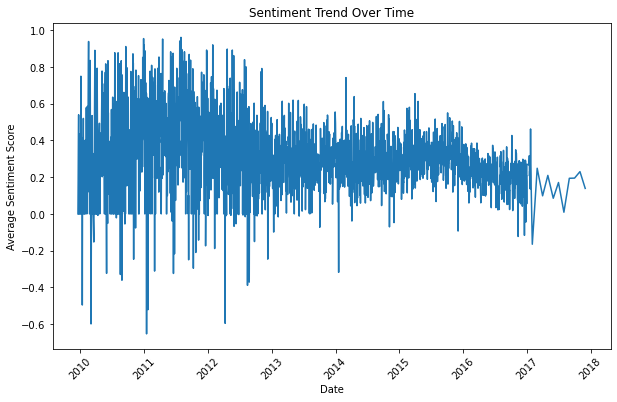

In [14]:
# Check if 'date_time' column exists for trend analysis
if 'date_time' in df.columns:
    # Convert 'date_time' to datetime format
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    # Calculate sentiment trend over time
    sentiment_trend = df.groupby(df['date_time'].dt.date)['Sentiment_Score'].mean()

    # Plot sentiment trend
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=sentiment_trend.index, y=sentiment_trend.values)
    plt.title("Sentiment Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average Sentiment Score")
    plt.xticks(rotation=45)
    plt.show()

### Bar Graph of Sentiment categories 

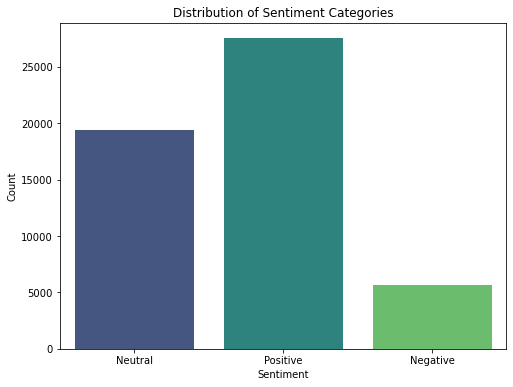

In [15]:
# Plot sentiment category distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment_Category', palette='viridis')
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


## Save the results with sentiment scores to a new CSV file.

In [16]:
# Save the results to a new CSV file
output_file = "sentiment_analysis_results.csv"
df.to_csv(output_file, index=False)
print(f"Sentiment analysis results saved to: {output_file}")

Sentiment analysis results saved to: sentiment_analysis_results.csv


### Barplot sentiment categories by day of week 

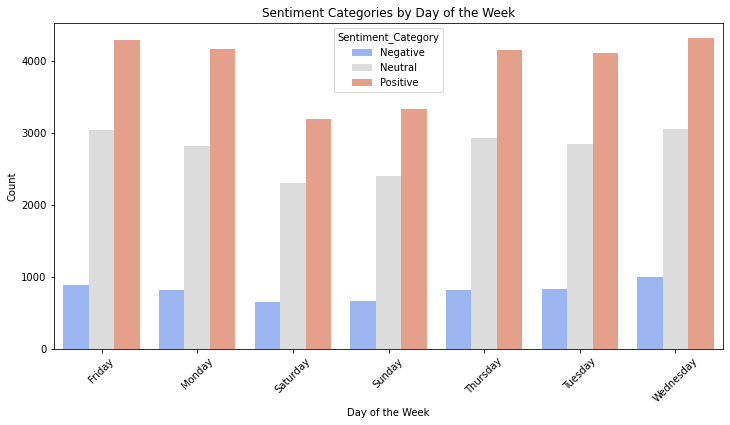

In [17]:
# Visualization: Sentiment by day of the week
if 'date_time' in df.columns:
    df['day_of_week'] = df['date_time'].dt.day_name()

    # Group by day of the week and sentiment category
    sentiment_by_day = df.groupby(['day_of_week', 'Sentiment_Category']).size().reset_index(name='Count')

    # Plot the sentiment trends by day of the week
    plt.figure(figsize=(12, 6))
    sns.barplot(data=sentiment_by_day, x='day_of_week', y='Count', hue='Sentiment_Category', palette='coolwarm')
    plt.title("Sentiment Categories by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The 'date_time' column is missing; skipping visualization.")


## Pie Chart of Sentiments 

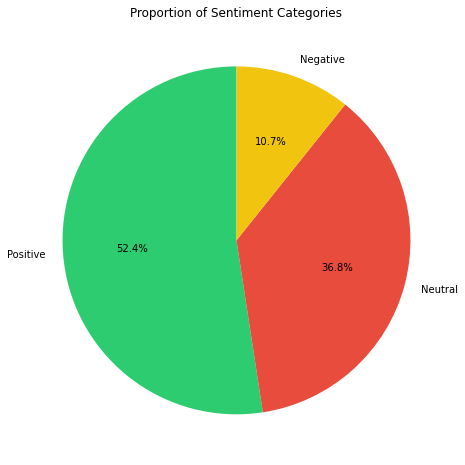

In [18]:
plt.figure(figsize=(8, 8))
df['Sentiment_Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c', '#f1c40f'])
plt.title("Proportion of Sentiment Categories")
plt.ylabel("")  # Remove default y-label
plt.show()


## Heat Map

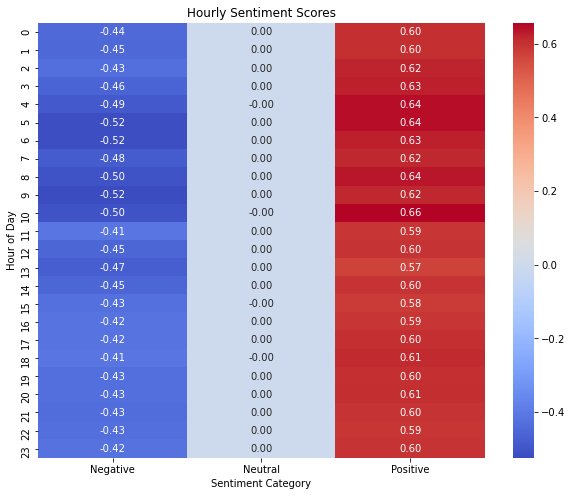

In [19]:
if 'date_time' in df.columns:
    df['hour'] = df['date_time'].dt.hour
    hourly_sentiment = df.groupby(['hour', 'Sentiment_Category'])['Sentiment_Score'].mean().unstack()

    plt.figure(figsize=(10, 8))
    sns.heatmap(hourly_sentiment, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title("Hourly Sentiment Scores")
    plt.xlabel("Sentiment Category")
    plt.ylabel("Hour of Day")
    plt.show()


## Histogram of Sentiment scores 

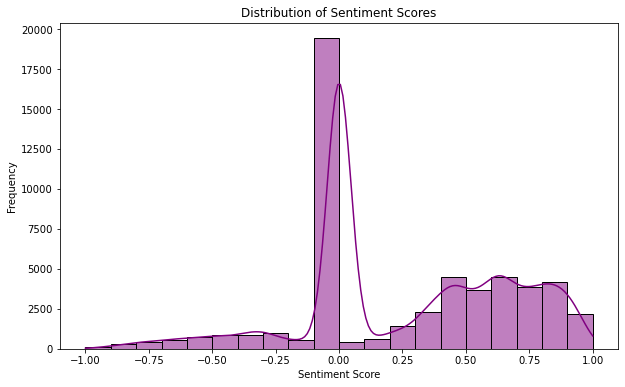

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Score'], bins=20, kde=True, color='purple')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


## Line graph

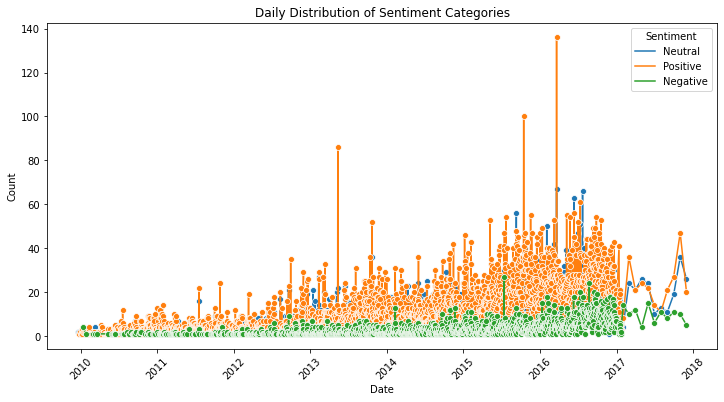

In [21]:
if 'date_time' in df.columns:
    # Group by date and sentiment category
    daily_sentiment = df.groupby([df['date_time'].dt.date, 'Sentiment_Category']).size().reset_index(name='Count')

    # Plot the sentiment distribution by date
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=daily_sentiment, x='date_time', y='Count', hue='Sentiment_Category', marker='o')
    plt.title("Daily Distribution of Sentiment Categories")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Sentiment")
    plt.show()


# Conclusion :-

1. **Positive Sentiment** (52.4%) :-
   - Many tweets express positivity, particularly those related to gratitude, support for social causes, or celebratory moments. Examples include thanking influential people like Barack Obama, sharing love and light during holidays, and supporting political movements like #LoveTrumpsHate.
   - Positive emotions are also visible in tweets related to personal events or public support for community movements, such as supporting Standing Rock or voting in elections.

2. **Neutral Sentiment** (36.8%) :-
   - A significant number of tweets carry a neutral sentiment, often sharing personal updates, fun moments, or general observations without any strong emotional charge. These tweets are primarily about daily life, travel, and casual interactions, like posting photos, expressing random thoughts, or interacting with fans.

3. **Negative Sentiment** (10.7%) :-
   - Some tweets express frustration or criticism, particularly related to political figures, social issues, or personal challenges. For instance, tweets criticizing Donald Trump's rhetoric or commenting on the struggles of the airline losing luggage are examples of negative sentiment.
   - Negative sentiments are also visible when discussing social injustices or personal frustrations, though these tend to be more balanced by the overall positive tone of her tweets.

The dataset reflects Katy Perry’s public persona as someone who is engaged, empathetic, and often uses her platform to express positivity, encourage social justice, and interact with her audience. While the overall sentiment is positive, there is also a notable presence of neutral and negative tweets, which reflects the balance between personal experiences and the larger social and political commentary she shares.